In [1]:
import pandas as pd
import sys
import adobe_analytics as aa
from adobe_analytics import Client, ReportDefinition
import numpy as np
import matplotlib.pyplot as plt

# 0. Authentication, Metrics, and Segments

In [2]:
# authenticate and obtain all report suites
client = Client('piermarco.milione@adevinta.com:Schibsted Spain', '89c7a04782709c99eb9b78df2eff5044')
suites = client.suites()

In [3]:
print('Choosen RS:')
print(suites['schibstedspainrefotocasaprod'])

Choosen RS:
(RAW) RealEstate Fotocasa (schibstedspainrefotocasaprod)


In [4]:
# select the report suite and create dataframe for metrics and segments
suite = suites["schibstedspainrefotocasaprod"]
df_metrics = pd.DataFrame(suite.metrics()).T
df_metrics = df_metrics.reset_index(drop=True)
df_segments = pd.DataFrame(suite.segments()).T
df_segments = df_segments.reset_index(drop=True)
df_dimensions = pd.DataFrame(suite.dimensions()).T
df_dimensions = df_dimensions.reset_index(drop=True)
all_metrics = list(df_metrics.id)
all_dim = list(df_dimensions.id)
lista_de_eventos = df_metrics[df_metrics.id.str.startswith('event')]

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_segments)

,name,id
0,Device: Mobile,s2165_57a07fade4b08d1648f6dd1d
1,Exclude Out of Spain and 0 Seconds,s2165_5e14600684a5013f91a387b4
2,CCAA Navarra,s2165_5ee7690ff4886e6b8fdb71aa
3,CCAA País Vasco,s2165_5ee76a2b1c252a31a7606f61
4,CCAA Ceuta y Melilla,s2165_5ee76ada96a3e319aee613be
5,Visits without pages,s2165_5ef07ead84a50140b07f7d89
6,Pisos para Comprar,s2165_5d6541dec2645611d677472a
7,Test Anunciante Frecuente - Grupo A,s2165_5de689eff4886e016fe09e11
8,Has an address,s2165_5e732781e9eaeb705a3f3748
9,CCAA Madrid,s2165_5ee768ec34ab6a2375a23f1b


In [10]:
# select segments/metrics/dimensions containing a word
#df_segments[df_segments.name.str.contains('EATM')]

,name,id
44,[EATM] - Todos los envíos,s2165_5e67b126f4886e03307cc6d9
71,[EATM]-24x7_Email-Categoria_TourVirtual,s2165_5ea950ab8d55e56b0e268091
76,[EATM]-24x7_Email-Categoria_Nuevo,s2165_5b84faa601c1eb7b39eb214b
77,[EATM]-24x7_Email-Categoria_Descubrelo,s2165_5b84fabd7a877dac5375b0a7
78,[EATM]-24x7_Email-Categoria_BajadaPrecio,s2165_5b84fb047245ec53dcded1ca
79,[EATM]-24x7_Email-Categoria_Recomedado,s2165_5bae275141bd55199612e84c
82,[EATM]-24x7_Email-Categoria_FreshContent,s2165_5cab36cc96a3e33cdffd5cb0
91,[EATM] - All EMAIL Engage,s2165_58824940e4b0839e91bef296
102,[EATM] - All PUSH Engage,s2165_5a5cf9a3d829376ca8af76fc
115,[EATM] - TOTAL PUSH+EMAIL Engage,s2165_5da984082b1c17394e981c5c


In [6]:
seg_ios = list(df_segments[df_segments.name=='Platform App iOS']['id'])
seg_android = list(df_segments[df_segments.name=='Platform App Android']['id'])
seg_web = list(df_segments[df_segments.name=='Platform Web']['id'])

# 1. API Requests

## 1.1 Page views of all pages 

In [7]:
# Request to Adobe Analystics Warehouse
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid','page'],
    metrics=['pageviews'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    #granularity='day',
    source="warehouse"
)
# send the request
%time dataframe = suite.download(report_def)

Exception: Warehouse request failed

In [19]:
dataframe.head

(5205748, 3)

In [20]:
# remove spaces in columns names
dataframe.columns = dataframe.columns.str.replace(' ', '_')
dataframe.columns = dataframe.columns.str.replace('(', '_')
dataframe.columns = dataframe.columns.str.replace(')', '_')
dataframe = dataframe[dataframe.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']
dataframe.Page_Views = dataframe.Page_Views.astype(int)
# dcast of the dataframe
df = dataframe.pivot_table(index=['Marketing_Cloud_Visitor_ID'], columns='Page',
                     values='Page_Views').reset_index()

In [ ]:
# drop list views, as this will included in list type and list view requests
del df['list']

In [22]:
df.shape

(1064495, 23)

In [23]:
df.to_csv('Data/202001_android_page_views.csv', index=False)

## 1.2 Page views por tipo de transacción

In [ ]:
# Request to Adobe Analystics Warehouse
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid','page','evar169'],
    metrics=['pageviews'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-02",
    #granularity='day',
    source="warehouse"
)
# send the request
%time dataframe = suite.download(report_def)

In [21]:
# remove spaces in columns names
dataframe.columns = dataframe.columns.str.replace(' ', '_')
dataframe.columns = dataframe.columns.str.replace('(', '_')
dataframe.columns = dataframe.columns.str.replace(')', '_')
dataframe = dataframe[dataframe.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']
# select pages
dataframe = dataframe[dataframe['Page'].isin(['detail','detail_map', 'homepage','my_alerts_list'])]
dataframe.Page_Views = dataframe.Page_Views.astype(int)

In [22]:
df = dataframe[dataframe['Transaction'].isin(['SALE','RENT'])]
# dcast of the dataframe
df = df.pivot_table(index=['Marketing_Cloud_Visitor_ID'], columns=['Page','Transaction'],
                     values='Page_Views').reset_index()

In [25]:
cols = pd.Series(df.columns.tolist()).apply(pd.Series).sum(axis=1)
df.columns = cols
# check before saving into Excel
print('Should be true:')
print(df.shape[0]==len(list(df.Marketing_Cloud_Visitor_ID.unique())))

Should be true:
True


In [27]:
df.to_csv('Data/202001_android_page_views_per_transaction.csv', index=False)

1.3 List views and list types por tipo de transacción

In [7]:
# Request to Adobe Analystics Warehouse
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid','evar126', 'evar169'],
    metrics=['pageviews'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    #granularity='day',
    source="warehouse"
)
# send the request
%time dataframe1 = suite.download(report_def)

total page count: 8
page number: 2
page number: 3
page number: 4
page number: 5
page number: 6
page number: 7
page number: 8
CPU times: user 43 s, sys: 1.81 s, total: 44.8 s
Wall time: 2h 49min 48s


In [10]:
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid','evar125', 'evar169'],
    metrics=['pageviews'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    #granularity='day',
    source="warehouse"
)
# send the request
%time dataframe2 = suite.download(report_def)

total page count: 7
page number: 2
page number: 3
page number: 4
page number: 5
page number: 6
page number: 7
CPU times: user 39 s, sys: 1.01 s, total: 40 s
Wall time: 1h 3min 10s


In [58]:
# remove spaces in columns names
dataframe1.columns = dataframe1.columns.str.replace(' ', '_')
dataframe1.columns = dataframe1.columns.str.replace('(', '_')
dataframe1.columns = dataframe1.columns.str.replace(')', '_')
dataframe1 = dataframe1[dataframe1.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']

In [59]:
# remove spaces in columns names
dataframe2.columns = dataframe2.columns.str.replace(' ', '_')
dataframe2.columns = dataframe2.columns.str.replace('(', '_')
dataframe2.columns = dataframe2.columns.str.replace(')', '_')
dataframe2 = dataframe2[dataframe2.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']
dataframe1.Page_Views = dataframe1.Page_Views.astype(int)
dataframe2.Page_Views = dataframe2.Page_Views.astype(int)

In [60]:
n = len(list(dataframe1.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)
n = len(list(dataframe2.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)

Número de usuarios en el perídodo seleccionado: 1091931
Número de usuarios en el perídodo seleccionado: 1091949


In [61]:
# exclude list_type = list because we have the 'list' variable in the list_view
dataframe1 = dataframe1[dataframe1.List_Type!='list']

In [47]:
df1 = dataframe1[dataframe1['Transaction'].isin(['SALE','RENT'])]
# dcast of the dataframe
df1 = df1.pivot_table(index=['Marketing_Cloud_Visitor_ID'], columns=['List_Type','Transaction'],
                     values='Page_Views').reset_index()
df2 = dataframe2[dataframe2['Transaction'].isin(['SALE','RENT'])]
# dcast of the dataframe
df2 = df2.pivot_table(index=['Marketing_Cloud_Visitor_ID'], columns=['List_View','Transaction'],
                     values='Page_Views').reset_index()

In [49]:
cols = pd.Series(df2.columns.tolist()).apply(pd.Series).sum(axis=1)
df2.columns = cols
# check before saving into Excel
print('Should be true:')
print(df2.shape[0]==len(list(df2.Marketing_Cloud_Visitor_ID.unique())))
print(df2.shape[0])

Should be true:
True
677998


In [51]:
cols = pd.Series(df1.columns.tolist()).apply(pd.Series).sum(axis=1)
df1.columns = cols
# check before saving into Excel
print('Should be true:')
print(df1.shape[0]==len(list(df1.Marketing_Cloud_Visitor_ID.unique())))
print(df1.shape[0])

Should be true:
True
260040


In [52]:
df = pd.merge(df1, df2, on='Marketing_Cloud_Visitor_ID', how='outer')
print(df.shape)

(679057, 15)


In [55]:
df.to_csv('Data/202001_android_list_views_per_transaction.csv', index=False)

1.4 All list view and list type

In [56]:
# Request to Adobe Analystics Warehouse
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid','evar126'],
    metrics=['pageviews'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    #granularity='day',
    source="warehouse"
)
# send the request
%time dataframe1 = suite.download(report_def)

total page count: 5
page number: 2
page number: 3
page number: 4
page number: 5
CPU times: user 21.5 s, sys: 729 ms, total: 22.2 s
Wall time: 1h 1min 24s


In [57]:
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid','evar125'],
    metrics=['pageviews'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    #granularity='day',
    source="warehouse"
)
# send the request
dataframe2 = suite.download(report_def)
%time

total page count: 5
page number: 2
page number: 3
page number: 4
page number: 5
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [228]:
# remove spaces in columns names
dataframe1.columns = dataframe1.columns.str.replace(' ', '_')
dataframe1.columns = dataframe1.columns.str.replace('(', '_')
dataframe1.columns = dataframe1.columns.str.replace(')', '_')
dataframe1 = dataframe1[dataframe1.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']
# remove spaces in columns names
dataframe2.columns = dataframe2.columns.str.replace(' ', '_')
dataframe2.columns = dataframe2.columns.str.replace('(', '_')
dataframe2.columns = dataframe2.columns.str.replace(')', '_')
dataframe2 = dataframe2[dataframe2.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']
dataframe1.Page_Views = dataframe1.Page_Views.astype(int)
dataframe2.Page_Views = dataframe2.Page_Views.astype(int)

/Users/piermarco.milione/opt/anaconda3/envs/fotocasa_env/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [65]:
n = len(list(dataframe1.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)
n = len(list(dataframe2.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)

Número de usuarios en el perídodo seleccionado: 1091498
Número de usuarios en el perídodo seleccionado: 1091949


In [232]:
# exclude list_type = list because we have the 'list' variable in the list_view
dataframe1 = dataframe1[dataframe1.List_Type!='list']

In [66]:
# dcast of the dataframe
df1 = dataframe1.pivot_table(index=['Marketing_Cloud_Visitor_ID'], columns=['List_Type'],
                     values='Page_Views').reset_index()
# dcast of the dataframe
df2 = dataframe2.pivot_table(index=['Marketing_Cloud_Visitor_ID'], columns=['List_View'],
                     values='Page_Views').reset_index()

In [69]:
## check before saving into Excel
print('Should be true:')
print(df1.shape[0])
print(df1.shape[0]==len(list(df1.Marketing_Cloud_Visitor_ID.unique())))
print('Should be true:')
print(df2.shape[0])
print(df2.shape[0]==len(list(df2.Marketing_Cloud_Visitor_ID.unique())))
df = pd.merge(df1, df2, on='Marketing_Cloud_Visitor_ID', how='outer')
print(df.shape)

Should be true:
265202
True
Should be true:
681778
True
(683262, 8)


In [70]:
df.to_csv('Data/202001_android_list_views.csv', index=False)

1.5 All events

In [6]:
# Request to Adobe Analystics Warehouse
all_events = list(lista_de_eventos.id)
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid'],
    metrics=all_events,
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    #granularity='day',
    source="warehouse"
)
# send the request
%time dataframe = suite.download(report_def)

total page count: 7
page number: 2
page number: 3
page number: 4
page number: 5
page number: 6
page number: 7
CPU times: user 20.4 s, sys: 1.4 s, total: 21.8 s
Wall time: 3h 13min 25s


In [11]:
# remove spaces in columns names
dataframe.columns = dataframe.columns.str.replace(' ', '_')
dataframe.columns = dataframe.columns.str.replace('(', '_')
dataframe.columns = dataframe.columns.str.replace(')', '_')
dataframe = dataframe[dataframe.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']

In [12]:
n = len(list(dataframe.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)

Número de usuarios en el perídodo seleccionado: 1091816


In [13]:
n = len(list(dataframe.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)
print('Check must be True:')
print(dataframe.shape[0]==len(list(dataframe.Marketing_Cloud_Visitor_ID.unique())))

Número de usuarios en el perídodo seleccionado: 1091816
Check must be True:
True


In [19]:
dataframe.to_csv('Data/202001_android_events.csv', index=False)

1.6 Selected events per transaction

In [151]:
# Request to Adobe Analystics Warehouse
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid','evar169'],
    metrics=['event1','event2','event7','event107','event31','event40'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    #granularity='day',
    source="warehouse"
)
# send the request
%time dataframe = suite.download(report_def)

total page count: 7
page number: 2
page number: 3
page number: 4
page number: 5
page number: 6
page number: 7
CPU times: user 28.4 s, sys: 1.4 s, total: 29.8 s
Wall time: 1h 4min 8s


In [152]:
# remove spaces in columns names
dataframe.columns = dataframe.columns.str.replace(' ', '_')
dataframe.columns = dataframe.columns.str.replace('(', '_')
dataframe.columns = dataframe.columns.str.replace(')', '_')
dataframe = dataframe[dataframe.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']

In [153]:
n = len(list(dataframe.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)

Número de usuarios en el perídodo seleccionado: 1093027


In [155]:
df = dataframe[dataframe['Transaction'].isin(['SALE','RENT'])]

In [156]:
dataframe.columns

Index(['Marketing_Cloud_Visitor_ID', 'Transaction', 'Lead_Confirmation_eMail',
       'Lead_Callphone', 'Lead_View_Phone', 'Lead_Counteroffer_eMail',
       'Alert_Added', 'Ad_Favourited'],
      dtype='object')

In [158]:
# change datatype to all events columns in dataframe
selected_cols = df.columns.str.contains("Lead")
selected_cols = list(df.columns[selected_cols])
selected_cols = list(set().union(selected_cols, ['Alert_Added','Ad_Favourited']))
for col in selected_cols:
    df.loc[:,(col)] = df[col].astype('int')

/Users/piermarco.milione/opt/anaconda3/envs/fotocasa_env/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/piermarco.milione/opt/anaconda3/envs/fotocasa_env/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [160]:
# dcast of the dataframe
df = df.pivot_table(index=['Marketing_Cloud_Visitor_ID'], columns=['Transaction'],
                     values=selected_cols).reset_index()

In [162]:
# create new names for columns after pivot
cols = pd.Series(df.columns.tolist()).apply(pd.Series).sum(axis=1)
df.columns = cols

In [163]:
n = len(list(df.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)
print('Check must be True:')
print(df.shape[0]==len(list(df.Marketing_Cloud_Visitor_ID.unique())))

Número de usuarios en el perídodo seleccionado: 1022253
Check must be True:
True


In [166]:
df.to_csv('Data/202001_android_events_per_transaction.csv', index=False)

1.5 Lead events per province

In [1]:
# Request to Adobe Analystics Warehouse
all_events = list(lista_de_eventos.id)
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid','evar57'],
    metrics=['event1','event2','event7','event107'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    #granularity='day',
    source="warehouse"
)
# send the request
%time dataframe = suite.download(report_def)

NameError: name 'lista_de_eventos' is not defined

In [9]:
# remove spaces in columns names
dataframe.columns = dataframe.columns.str.replace(' ', '_')
dataframe.columns = dataframe.columns.str.replace('(', '_')
dataframe.columns = dataframe.columns.str.replace(')', '_')
dataframe = dataframe[dataframe.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']

In [33]:
len(list(dataframe.Marketing_Cloud_Visitor_ID.unique()))

1092319

In [13]:
#prov = pd.DataFrame(dataframe.province.unique())
#prov.to_excel('Data/province_list.xlsx', index=False)

prov = pd.read_excel('province_list.xlsx')
PIB = pd.read_excel('PIB_provincias.xlsx',index=True)
PIB = PIB[['prov','Peso PIB']]
prov = prov.rename(columns={'Nombre':'prov'})
prov.prov = [str(x).lower() for x in prov.prov]
PIB.prov = [str(x).lower() for x in PIB.prov]
prov1 = pd.merge(prov, PIB, on='prov', how='left')
prov1.to_excel('province_list.xlsx', index=False)

In [34]:
prov = pd.read_excel('Data/province_list.xlsx')
prov['peso_pib'] = round(prov['peso_pib']*100,2)
prov = prov.sort_values('peso_pib', axis=0, ascending=False, inplace=False, 
                        kind='quicksort', na_position='last').reset_index(drop=True)

In [35]:
prov

,prov,peso_pib
0,madrid,18.87
1,barcelona,14.01
2,valencia,5.01
3,sevilla,3.32
4,bizkaia,3.10
5,alicante,3.10
6,murcia,2.61
7,m??laga,2.60
8,illes balears,2.53
9,a coru??a,2.30


In [36]:
prov.loc[prov['prov'].isin(prov[0:2].prov) , 'city_size'] = prov.prov
prov.loc[prov['prov'].isin(prov[2:6].prov) , 'city_size'] = 'big'
prov.loc[prov['prov'].isin(prov[6:].prov) , 'city_size'] = 'little'
prov = prov.rename(columns={'prov':'Province'})

In [42]:
prov.Province.unique()

array(['madrid', 'barcelona', 'valencia', 'sevilla', 'bizkaia',
       'alicante', 'murcia', 'm??laga', 'illes balears', 'a coru??a',
       'zaragoza', 'tarragona', 'gipuzkoa', 'las palmas', 'asturias',
       'girona', 'c??diz', 'santa cruz de tenerife', 'pontevedra',
       'navarra', 'granada', 'castell??n', 'c??rdoba', 'valladolid',
       'cantabria', 'lleida', 'toledo', 'ja??n', 'almer??a', 'badajoz',
       'le??n', 'ciudad real', 'burgos', 'huelva', 'la rioja', 'albacete',
       'lugo', 'salamanca', 'c??ceres', 'ourense', 'huesca',
       'guadalajara', 'cuenca', 'palencia', 'segovia', 'teruel', 'zamora',
       '??vila', 'soria', 'ceuta', 'melilla', 'multiples provincias',
       'araba - ??lava', 'andorra', 'cerdanya francesa',
       'pa??s vasco franc??s'], dtype=object)

In [43]:
dataframe.Province = [str(x).lower() for x in dataframe.Province]

In [52]:
dataframe1 = dataframe[dataframe.Province!='nan']

In [56]:
n = len(list(dataframe.Marketing_Cloud_Visitor_ID.unique()))
m = len(list(dataframe1.Marketing_Cloud_Visitor_ID.unique()))
print('Usuarios con todos los leads sin provincia')
print((n-m)/n*100)

Usuarios con todos los leads sin provincia
6.63084684968402


In [57]:
df = pd.merge(dataframe, prov, how='left', on='Province')
df = df.drop(columns=['peso_pib','Province',])

In [58]:
selected_cols = df.columns.str.contains("Lead")
selected_cols = list(df.columns[selected_cols])

In [59]:
# change datatype to all columns containing Lead
for col in selected_cols:
    df[col] = df[col].astype('int')
# dcast of the dataframe
df = df.pivot_table(index=['Marketing_Cloud_Visitor_ID'], columns=['city_size'],
                     values=selected_cols).reset_index()

In [30]:
cols = pd.Series(df.columns.tolist()).apply(pd.Series).sum(axis=1)
df.columns = cols

In [61]:
n = len(list(df.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)
print('Check must be True:')
print(df.shape[0]==len(list(df.Marketing_Cloud_Visitor_ID.unique())))

Número de usuarios en el perídodo seleccionado: 1019889
Check must be True:
True


In [63]:
df.to_csv('Data/202001_android_leads_per_province.csv', index=False)

1.6 Usuarios Registrados

In [108]:
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid','evar14'],
    metrics=['visits'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    source="warehouse"
)
# send the request
%time dataframe = suite.download(report_def)

total page count: 3
page number: 2
page number: 3
CPU times: user 13.7 s, sys: 771 ms, total: 14.5 s
Wall time: 1h 6min 15s


In [111]:
# remove spaces in columns names
dataframe.columns = dataframe.columns.str.replace(' ', '_')
dataframe.columns = dataframe.columns.str.replace('(', '_')
dataframe.columns = dataframe.columns.str.replace(')', '_')
dataframe = dataframe[dataframe.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']

In [118]:
df = dataframe.dropna(subset=['User_ID'])

In [122]:
n = len(list(df.Marketing_Cloud_Visitor_ID.unique()))
print('Número de usuarios en el perídodo seleccionado:', n)
print('Check must be True:')
print(df.shape[0]==len(list(df.Marketing_Cloud_Visitor_ID.unique())))

Número de usuarios en el perídodo seleccionado: 223392
Check must be True:
False


In [134]:
df_aux = df[['Marketing_Cloud_Visitor_ID','Visits']].groupby('Marketing_Cloud_Visitor_ID').count().sort_values(by='Visits', ascending=False).rename(columns={'Visits':'n_of_user_ids'})


In [136]:
df = df.set_index('Marketing_Cloud_Visitor_ID')
df1 = pd.merge(df, df_aux, on ='Marketing_Cloud_Visitor_ID', how='left')

In [146]:
df1 = df1.reset_index(drop=False)

In [148]:
df1.to_csv('Data/202001_android_registered_users')

1.7 Eventos cross-site

In [149]:
def extract_customer_data(choosen_suites, date_from, date_to, choosen_segments=[], choosen_metrics=['visits'], granularity='day'):
    df = pd.DataFrame({'Marketing_Cloud_Visitor_ID' : []})
    for s in choosen_suites:
        # select the report suite
        suite = suites[s]
        print('Extracting customer data from: ' + str(suite))
        # select the segment
        df_segments = pd.DataFrame(suite.segments()).T
        df_segments = df_segments.reset_index(drop=True)
        segment = list(df_segments[df_segments.name==choosen_segments]['id'])
        print('Segment: ' + str(choosen_segments))
        print('Metric: ' + str(choosen_metrics))
        print('Granularity: ' + str(granularity))
        # Send Request to AA Warehouse
        report_def = ReportDefinition(
        dimensions=['marketingcloudvisitorid'],
        metrics=choosen_metrics,
        segments=segment,
        date_from=date_from,
        date_to=date_to,
        #granularity=granularity,
        source="warehouse"
        )
        # send the request
        dataframe = suite.download(report_def)
        print('Shape:')
        print(dataframe.shape)
        dataframe.columns = dataframe.columns.str.replace(' ', '_')
        df = pd.merge(df, dataframe, on=['Marketing_Cloud_Visitor_ID'], how='outer')
        print('Shape after outer join:')
        print(df.shape)
    return df

In [150]:
choosen_suites = [ 'schibstedspainjobsinfojobsprod', 
                  'schibstedspainmotorcochesnetprod',
                 'schibstedspainmiscmilanunciosprod']
choosen_segments = 'Platform App Android'
choosen_metrics = ['event31', 'event3', 'event4', 'visits']
dataframe = extract_customer_data(choosen_suites=choosen_suites, 
                            date_from='2020-01-01', 
                            date_to='2020-01-31', 
                            choosen_segments=choosen_segments, 
                            choosen_metrics=choosen_metrics)

Extracting customer data from: (RAW) Jobs Infojobs (schibstedspainjobsinfojobsprod)
Segment: Platform App Android
Metric: ['event31', 'event3', 'event4', 'visits']
Granularity: day
total page count: 4
page number: 2
page number: 3
page number: 4
Shape:
(1389855, 5)
Shape after outer join:
(1389855, 5)
Extracting customer data from: (RAW) Motor Cochesnet Prod (schibstedspainmotorcochesnetprod)
Segment: Platform App Android
Metric: ['event31', 'event3', 'event4', 'visits']
Granularity: day
total page count: 2
page number: 2
Shape:
(565292, 5)
Shape after outer join:
(1955146, 9)
Extracting customer data from: (RAW) Generalist Milanuncios (schibstedspainmiscmilanunciosprod)
Segment: Platform App Android
Metric: ['event31', 'event3', 'event4', 'visits']
Granularity: day


KeyboardInterrupt: 

1.8 Frecuencia de visitas

In [64]:
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid'],
    metrics=['visits'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    granularity='day',
    source="warehouse"
)
# send the request
%time dataframe = suite.download(report_def)

total page count: 14
page number: 2
page number: 3
page number: 4
page number: 5
page number: 6
page number: 7
page number: 8
page number: 9
page number: 10
page number: 11
page number: 12
page number: 13
page number: 14
CPU times: user 31.5 s, sys: 3.84 s, total: 35.4 s
Wall time: 57min 31s


In [2]:
#dataframe.to_csv('Data/202001_android_daily_visits_per_user.csv')
dataframe  = pd.read_csv('Data/AdobeData/android_daily_visits_per_user_202001.csv', index_col=0)

/Users/piermarco.milione/opt/anaconda3/envs/fotocasa_env/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
dataframe.shape

(4673337, 3)

In [4]:
# remove spaces in columns names
dataframe.columns = dataframe.columns.str.replace(' ', '_')
dataframe.columns = dataframe.columns.str.replace('(', '_')
dataframe.columns = dataframe.columns.str.replace(')', '_')
dataframe = dataframe[dataframe.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']
# remove time from Datetime columns
dataframe.loc[:, ('Date')] = pd.DatetimeIndex(dataframe.Datetime).normalize()

In [5]:
dataframe.head()

,Datetime,Marketing_Cloud_Visitor_ID,Visits,Date
1,2020-01-01 00:00:00,00000407524030170034329152187891187137,2,2020-01-01
2,2020-01-01 00:00:00,00001225805363556352567682227342836429,2,2020-01-01
3,2020-01-01 00:00:00,00002575609447976674466927358066308150,2,2020-01-01
4,2020-01-01 00:00:00,00003359938884015262322109109977356941,1,2020-01-01
5,2020-01-01 00:00:00,00004133799147884941035372258409605322,1,2020-01-01


In [6]:
print('MAU:')
len(list(dataframe.Marketing_Cloud_Visitor_ID.unique()))

MAU:


1092420

In [7]:
# pivot Datetime column on user_id column
dataframe.loc[:, ('Visits')] = dataframe.Visits.astype(int)
df = dataframe.pivot_table(index=['Marketing_Cloud_Visitor_ID'], 
                           columns=['Date'], 
                           values='Visits').reset_index(drop=False)
df = df.fillna(0)

In [8]:
# me aseguro que todos los días estén en la tabla
# luego podré contar 0's para contar los días de inactividad
print(len(list(df.columns))-1)

31


In [9]:
# compute inactivity days per user
inactive_days = pd.DataFrame((df == 0).sum(axis=1))

In [10]:
# join inactive days to original df
inactive_days = inactive_days.rename(columns={0:'total_active_days'})
df = pd.merge(df, inactive_days, how='left', left_index=True, right_index=True)

In [11]:
# compute total active days
df.loc[:, ('total_active_days')] = 31-df.total_active_days

In [12]:
df.head()

,Marketing_Cloud_Visitor_ID,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,...,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,total_active_days
0,00000051745022542041818069014855750667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,00000107708722978450827756473807907358,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,4.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,17
2,00000136845845092372076348413986631894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,00000293011003412524344469397089860697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1
4,00000405678892241762669292114416707989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


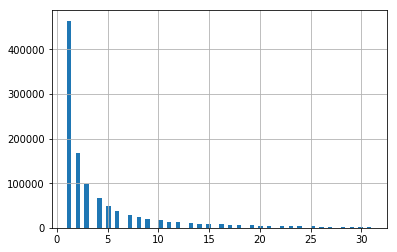

In [13]:
#print(Counter(df.inactive_days))
df.total_active_days.hist(bins=70)
plt.show()

In [14]:
df.groupby('total_active_days').count().Marketing_Cloud_Visitor_ID

total_active_days
1     463961
2     167503
3      97621
4      66017
5      48547
6      37622
7      29765
8      24135
9      20279
10     17024
11     14088
12     12711
13     10947
14      9628
15      8749
16      7545
17      6884
18      6008
19      5387
20      4959
21      4699
22      4096
23      3656
24      3425
25      3011
26      2732
27      2562
28      2358
29      2246
30      2131
31      2124
Name: Marketing_Cloud_Visitor_ID, dtype: int64

compute lengths of consecutive zeros

In [15]:
from statistics import mean, median 

# stat can be one of the following 'max', 'min', 'mean', 'median'
def stat_len_consec_zeros(a, stat):
    a = np.array(list(a))    # convert elements to `str`
    rr = np.argwhere(a == '0').ravel()  # find out positions of `0`
    if not rr.size:  # if there are no zeros, return 0
        return 0

    full = np.arange(rr[0], rr[-1]+1)  # get the range of spread of 0s

    # get the indices where `0` was flipped to something else
    diff = np.setdiff1d(full, rr)
    if not diff.size:     # if there are no bit flips, return the 
        return len(full)  # size of the full range

    # break the array into pieces wherever there's a bit flip
    # and the result is the size of the largest chunk
    pos, difs = full[0], []
    for el in diff:
        difs.append(el - pos)
        pos = el + 1
    
    # include possible last chunk in the count!!
    difs.append(rr[-1] - diff[-1])

    difs = list(filter(lambda a: a > 0, difs))

    if stat=='max':
        # return size of the largest chunk
        res = max(difs) if len(difs) != 0 else 0
    if stat=='min':
        # return size of the smallest chunk
        res = min(difs) if len(difs) != 0 else 0
    if stat=='mean':
        # return mean size of chunks
        res = mean(difs) if len(difs) != 0 else 0

    return res

In [16]:
df = df.set_index('Marketing_Cloud_Visitor_ID')

MAX

Apply Function to compute max inactivity per user

In [17]:
# concatenated and then apply the function
df_aux = df.copy() 
del df_aux['total_active_days']
df_aux = df_aux.astype(int)
df_aux['concated'] = df_aux.astype(str).apply(lambda x: ''.join(x), axis=1)
df_aux['max_inactive_days'] = df_aux.concated.apply(lambda x: stat_len_consec_zeros(x, stat='max'))
df_max = df_aux['max_inactive_days'].copy()

MIN

Apply Function to compute min inactivity per user

In [18]:
# concatenated and then apply the function
df_aux = df.copy()
del df_aux['total_active_days']
df_aux = df_aux.astype(int)
df_aux['concated'] = df_aux.astype(str).apply(lambda x: ''.join(x), axis=1)
df_aux['min_inactive_days'] = df_aux.concated.apply(lambda x: stat_len_consec_zeros(x, stat='min'))
df_min = df_aux['min_inactive_days'].copy()

MEAN

Apply Function to compute mean inactivity per user

In [19]:
# concatenated and then apply the function
df_aux = df.copy()
del df_aux['total_active_days']
df_aux = df_aux.astype(int)
df_aux['concated'] = df_aux.astype(str).apply(lambda x: ''.join(x), axis=1)
df_aux['mean_inactive_days'] = df_aux.concated.apply(lambda x: stat_len_consec_zeros(x, stat='mean'))
df_mean = df_aux['mean_inactive_days'].copy()

Join Max, Mean, and Mean inactivity days to original dataframe df

In [20]:
df = pd.merge(df, df_mean, on='Marketing_Cloud_Visitor_ID', how='left')
df = pd.merge(df, df_max, on='Marketing_Cloud_Visitor_ID', how='left')
df = pd.merge(df, df_min, on='Marketing_Cloud_Visitor_ID', how='left')

In [21]:
frequency_features = ['total_active_days', 'mean_inactive_days', 'max_inactive_days', 'min_inactive_days']
df = df[frequency_features]

In [102]:
df.to_csv('Data/202001_android_frequency.csv', index=False)

Analysis of User Frecueuncy

/Users/piermarco.milione/opt/anaconda3/envs/fotocasa_env/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


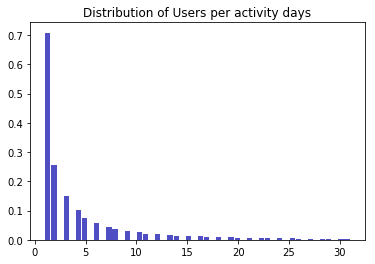

In [22]:
plt.hist(df.total_active_days, normed=1, bins=50, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Distribution of Users per activity days')
plt.show()

In [24]:
df_low =df[df.total_active_days==1]

In [41]:
df_low[(df_low.max_inactive_days==28)].shape[0]/df_low.shape[0]

0.07024512836208216

In [38]:
df_low[(df_low.max_inactive_days==27)].min_inactive_days.unique()

array([3])

In [32]:
df_low[(df_low.max_inactive_days==29)].shape[0]/df_low.shape[0]

0.0725858423445074

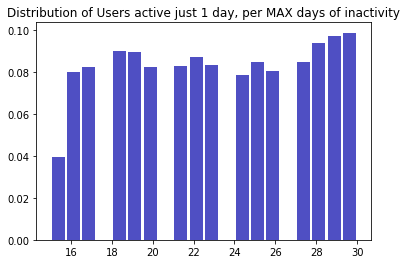

In [51]:
plt.hist(df_low.max_inactive_days, density=1, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Distribution of Users active just 1 day, per MAX days of inactivity')
plt.show()

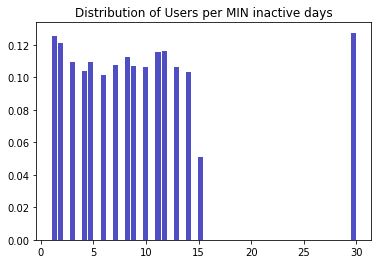

In [26]:
plt.hist(df_low.min_inactive_days, density=1, bins=50, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Distribution of Users per MIN inactive days')
plt.show()

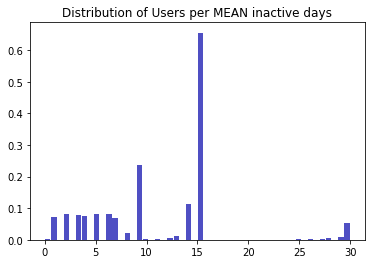

In [41]:
plt.hist(df.mean_inactive_days, density=1, bins=50, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Distribution of Users per MEAN inactive days')
plt.show()

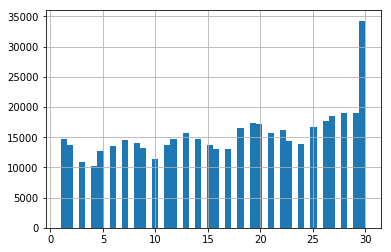

In [43]:
inactivity_treshold = 1
max_consecutive_treshold = 26

In [ ]:
df_inactive = df_aux[df_aux.total_active_days <= inactivity_treshold]
df_inactive.max_consecutive_zeros.hist(bins=50)
plt.show()

In [41]:
df_inactive[df_inactive.max_consecutive_zeros >= max_consecutive_treshold]

,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,...,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,total_active_days,concated,max_consecutive_zeros
Marketing_Cloud_Visitor_ID,,,,,,,,,,,,,,,,,,,,,
00000293011003412524344469397089860697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,00000000000000000000000000002001,28
00002201844017007621091194261614700632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,00000000000000000000000000001001,28
00002619012576957284147658887455149687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,00000000000000000000000000000101,29
00002750202463787182381879625848072279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,00000000000000000000000000000011,30
00003276362500282751842587828902065975,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,00000000000000000000000000200001,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92228977439761653252000494003987427757,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,00000000000000000000000000100001,26
92229613224919320063721953572345176047,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,00000000000000000000000000100001,26
92230114067003726791733697778179621107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,00000000000000000000000000010001,27


1.9 Visits per Marketing Channel

In [ ]:
# Request to Adobe Analystics Warehouse
report_def = ReportDefinition(
    dimensions=['marketingcloudvisitorid', 'lasttouchchannel'],
    metrics=['visits'],
    segments=seg_android,
    date_from="2020-01-01",
    date_to="2020-01-31",
    #granularity='day',
    source="warehouse"
)
# send the request
%time dataframe = suite.download(report_def)

In [ ]:
# remove spaces in columns names
dataframe.columns = dataframe.columns.str.replace(' ', '_')
dataframe.columns = dataframe.columns.str.replace('(', '_')
dataframe.columns = dataframe.columns.str.replace(')', '_')
dataframe = dataframe[dataframe.Marketing_Cloud_Visitor_ID!='00000000000000000000000000000000000000']

In [ ]:
dataframe.Visits = dataframe.Visits.astype(int)
# dcast of the dataframe
df = dataframe.pivot_table(index=['Marketing_Cloud_Visitor_ID'], columns='Last_Touch_Marketing_Channel',
                     values='Visits').reset_index()

In [ ]:
cols = pd.Series(df.columns.tolist()).apply(pd.Series).sum(axis=1)
df.columns = cols

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.to_csv('Data/Complements/202001_android_visits_source.csv', index=False)

TEST

Enseñar cómo calculo con la función paso a paso

In [35]:
a = '0000000002010200000000000000000'
a = np.array(list(a))    # convert elements to `str`
rr = np.argwhere(a == '0').ravel()  # find out positions of `0`
if not rr.size:  # if there are no zeros, return 0
    print('0')

In [36]:
# indeces of zero position (firstindex is 0)
rr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
full = np.arange(rr[0], rr[-1]+1)  # get the range of spread of 0's 

In [39]:
# get the indices where `0` was flipped to something else
diff = np.setdiff1d(full, rr)
if not diff.size:     # if there are no bit flips, return the 
    print( len(full) )

In [45]:
# break the array into pieces wherever there's a bit flip
# and the result is the size of the largest chunk
pos, difs = full[0], []
for el in diff:
    difs.append(el - pos)
    pos = el + 1
# include possible last chunk in the count!!
difs.append(rr[-1] - diff[-1])

In [46]:
difs


[9, 1, 1, 17]

In [47]:
difs = list(filter(lambda a: a > 0, difs))

In [48]:
difs


[9, 1, 1, 17]

In [50]:
max(difs)

17